## Machine Failure

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## 데이터 로드
mc_data = pd.read_csv('/content/SKTFLY/machine_failure.csv')

# https://drive.google.com/file/d/1PT47dmcv8W3KbQuSJjCaQ2RJAxIq88FA/view?usp=drive_link

In [ ]:
# 컬럼에 결측치가 몇개나 있는지 확인
print(mc_data.isnull().sum())

id              0
type            0
temp_air        0
temp_process    0
speed           0
torque          0
tool_wear       0
is_failure      0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 타입은 문자라 그대로 사용할 수 없어서 인코딩
type_labeled = LabelEncoder().fit_transform(mc_data['type'])

# x로 사용될 컬럼만 선택
mc_X = mc_data.drop(['id','type','is_failure'],axis=1)
mc_X['type'] = type_labeled

# y로 사용될 컬럼만 선택
mc_y = mc_data['is_failure']


print(mc_y.shape)
print(mc_X.shape)

(9982,)
(9982, 6)


In [ ]:
## 데이터 분리
# test_size, random_state를 변경해 가면서 테스트 해볼 수 있음
X_train, X_test, y_train, y_test = train_test_split(mc_X,
                                                    mc_y,
                                                    test_size=0.3,
                                                    random_state=11)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [ ]:
### 의사결정나무
dt_clf = DecisionTreeClassifier(random_state=20, max_depth = 8, min_samples_leaf = 4)
dt_clf.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=20)

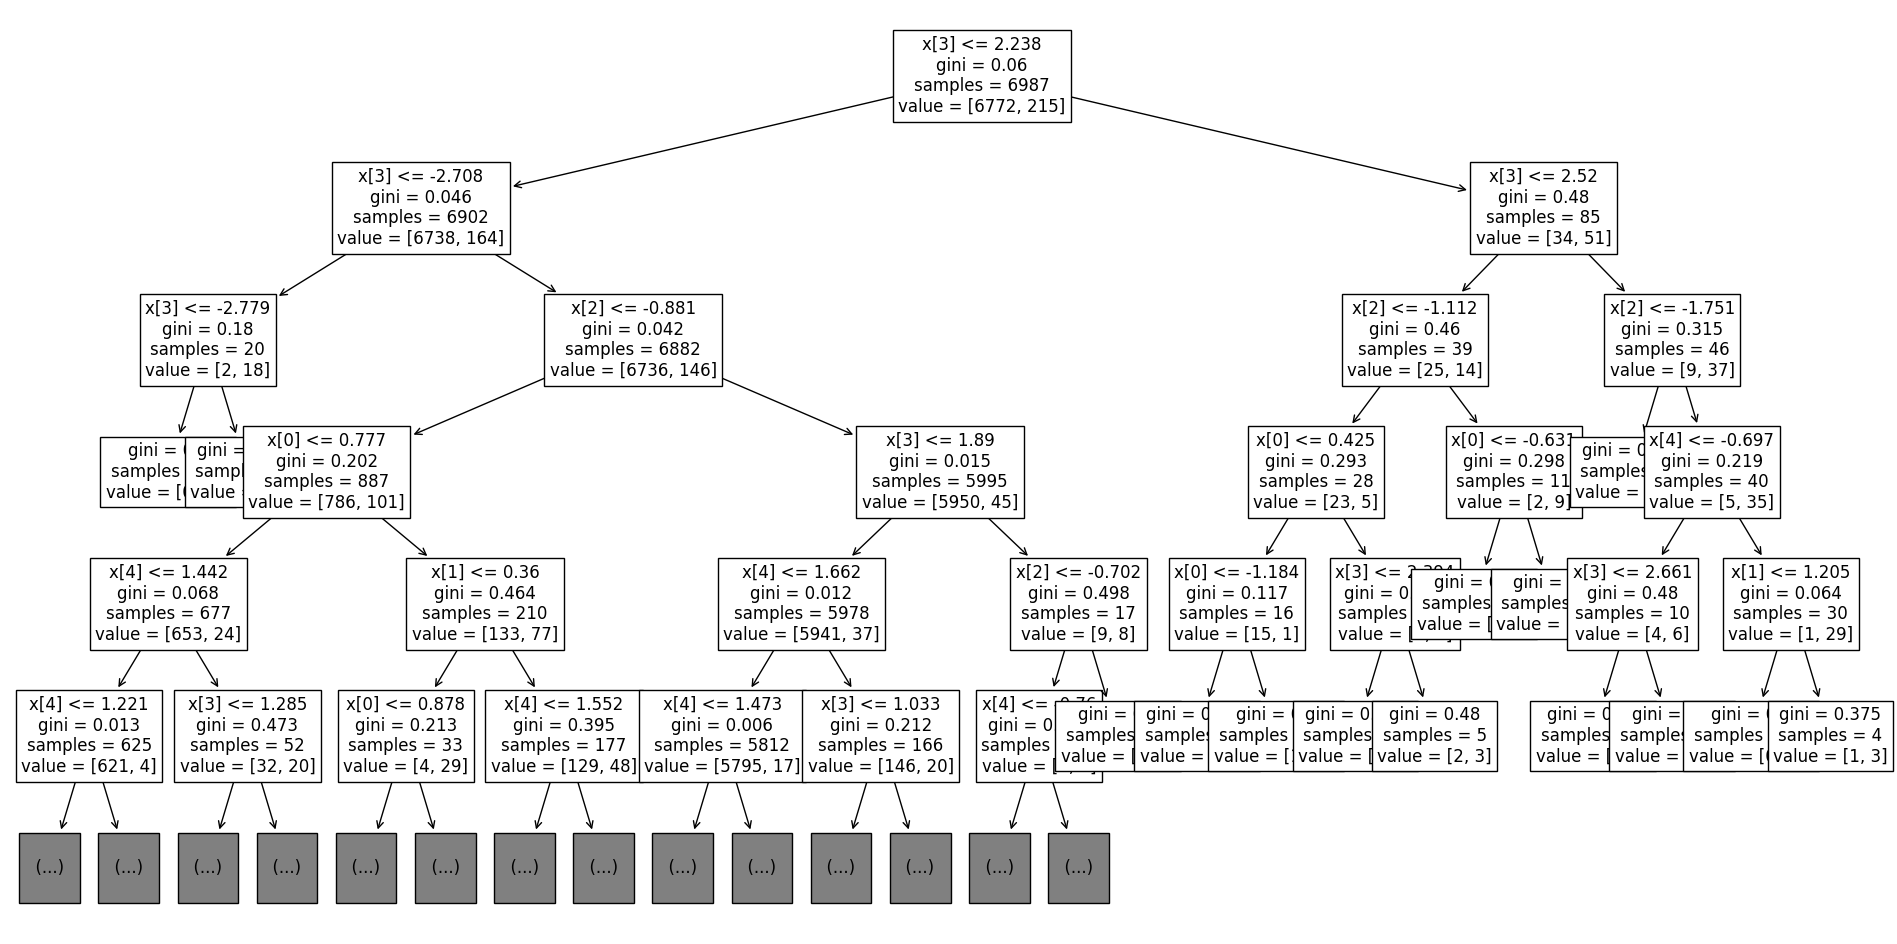

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24,12))
plot_tree(dt_clf, max_depth=5, fontsize=12)
plt.show()

In [ ]:
pred_test = dt_clf.predict(scaled_X_test)
pred_train = dt_clf.predict(scaled_X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('test 정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))
print('train 정확도: {0:.4f}'.format(accuracy_score(y_train,pred_train)))

test 정확도: 0.9783
train 정확도: 0.9893


In [ ]:
## 교차검증
scores = cross_val_score(dt_clf,scaled_X_train,y_train,
                         scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9854 0.9854 0.9781]
평균 검증 정확도: 0.983
